In [1]:
#s Classify movies reviews from IMDB
## Import tensorflow and keras
## import numpy

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)


1.9.0


In [5]:
## download the imdb dataset
imdb = keras.datasets.imdb
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 224s 13us/step


In [8]:
# num_words=10000 keeps the top 10000 most frequently occuring words in the 
# training data.


#print the number of entries in test and train test

In [9]:
print("training entries: {}, labels: {}".format(len(train_data),len(train_labels)))

training entries: 25000, labels: 25000


In [11]:
#each integer represents a different word. Text of reviews are converted to integers
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [12]:
#Show number of words in 1st and 2nd review

In [15]:
(len(train_data[0]), len(train_data[1]))

(218, 189)

In [16]:
## Convert integers back to word with help of word_index 


In [17]:
#dictionary mapping words to an integer indes
word_index = imdb.get_word_index()

#the first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] =0
word_index["<START"] =1
word_index["<UNK>"]=2 #unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

1646592/1641221 [==============================] - 15s 9us/step


In [18]:
decode_review(train_data[0])

"<START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [19]:
decode_review(train_data[1])

"<START big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [20]:
decode_review(test_data[1])

"<START this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances <UNK> the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere <UNK> with sexual tension and psychological <UNK> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the <UNK> moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual <UNK> and desperation be patient <UNK> up t

In [25]:
## Prepare the data
# pad the data (max_len = 256)

In [24]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                      value= word_index["<PAD>"],
                                                      padding='post',
                                                      maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding = 'post',
                                                       maxlen=256)


In [26]:
len(train_data[0])
len(test_data[1])

256

In [27]:
len(train_data[1])

256

In [28]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [29]:
## Build the model


In [30]:
#input size is vocabulary count used for the movie reviews(10000 words)

In [31]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation= tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Loss function and optimizer


In [33]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [35]:
## Create a cross-validation set

x_val = train_data[:10000]
partial_x_train =train_data[10000:]

y_val=train_labels[:10000]
partial_y_train = train_labels[10000:]

In [36]:
## Train the model

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val,y_val),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 108us/step - loss: 0.7083 - acc: 0.5130 - val_loss: 0.6917 - val_acc: 0.5182
Epoch 2/40
15000/15000 [==============================] - 1s 86us/step - loss: 0.6902 - acc: 0.5393 - val_loss: 0.6886 - val_acc: 0.5716
Epoch 3/40
15000/15000 [==============================] - 1s 85us/step - loss: 0.6864 - acc: 0.6067 - val_loss: 0.6856 - val_acc: 0.6104
Epoch 4/40
15000/15000 [==============================] - 1s 86us/step - loss: 0.6828 - acc: 0.6770 - val_loss: 0.6820 - val_acc: 0.6495
Epoch 5/40
15000/15000 [==============================] - 1s 87us/step - loss: 0.6785 - acc: 0.6779 - val_loss: 0.6776 - val_acc: 0.7286
Epoch 6/40
15000/15000 [==============================] - 1s 87us/step - loss: 0.6734 - acc: 0.7581 - val_loss: 0.6725 - val_acc: 0.7499
Epoch 7/40
15000/15000 [==============================] - 1s 96us/step - loss: 0.6671 - acc: 0.7659 - val_loss: 0.6664 - val_ac

In [37]:
results = model.evaluate(test_data,test_labels)

25000/25000 [==============================] - 1s 25us/step


In [38]:
print(results)

[0.3115515372657776, 0.87144]


In [39]:
# Create a graph of accuracy and loss over time

history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [40]:
import matplotlib.pyplot as plt


In [41]:
acc = history.history['acc']
val_acc= history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

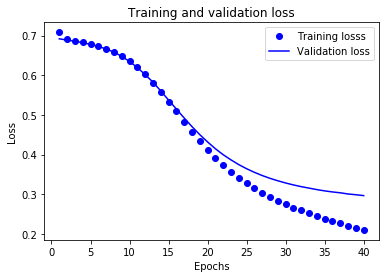

In [42]:
epochs = range(1,len(acc) +1)

# "bo" is for bleu dot
plt.plot(epochs,loss,'bo',label='Training losss')
#b is for 'solid blue line'
plt.plot(epochs,val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
plt.clf()

<Figure size 432x288 with 0 Axes>

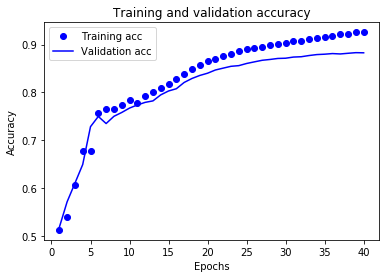

In [44]:
acc_values  = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs,acc,'bo', label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()